# Central Limit Theorem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import warnings
warnings.filterwarnings(action='ignore')
random.seed(123)
np.random.seed(123)

Normal Distribution
<br>
Standard Normal Distribution -> Mean 0, Std 1

In [23]:
mu = 0
variance = 1
sigma = math.sqrt(variance)

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000000)
pdf = stats.norm.pdf(x, mu, sigma)

x_sample = np.random.normal(loc=mu, scale=sigma, size=10)

In [24]:
x_sample.mean()

-0.43539632282884594

In [27]:
x.mean()

-9.68157110037282e-16

## Plot of our Population Distribution

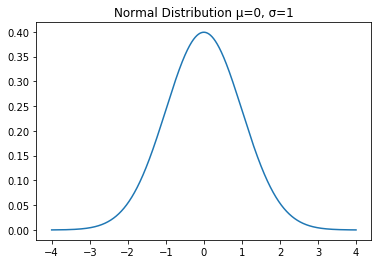

In [3]:
plt.plot(x, pdf, label='PDF')
plt.title('Normal Distribution µ=0, σ=1')

plt.show()

## Plot to prove properties of a Noramal Distribution

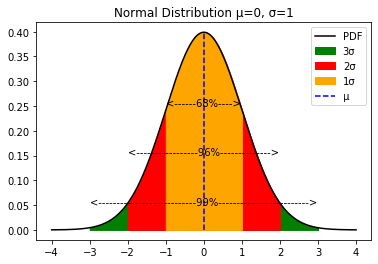

In [4]:
plt.plot(x, pdf, label='PDF', color='black')
plt.title('Normal Distribution µ=0, σ=1')

plt.fill_between(np.linspace(-3, 3, 1000), np.zeros((1000,)), 
                 stats.norm.pdf(np.linspace(-3, 3, 1000), mu, sigma), color='green', label='3σ')

plt.fill_between(np.linspace(-2, 2, 1000), np.zeros((1000,)), 
                 stats.norm.pdf(np.linspace(-2, 2, 1000), mu, sigma), color='red', label='2σ')


plt.fill_between(np.linspace(-1, 1, 1000), np.zeros((1000,)), 
                 stats.norm.pdf(np.linspace(-1, 1, 1000), mu, sigma), color='orange', label='1σ')

plt.vlines(0, 0, stats.norm.pdf(0, mu, sigma), linestyles= '--', color='blue', label='µ')

plt.text(-1, 0.25, "<------68%---->")


plt.text(-2, 0.15, "<-----------------95%-------------->")


plt.text(-3, 0.05, "<---------------------------99.7%------------------------->")

plt.legend()

plt.show()

## Plot showing sampling from a population

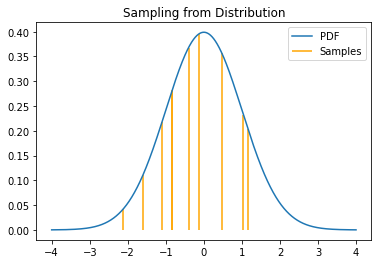

In [29]:
plt.plot(x, pdf, label='PDF')
plt.vlines(x_sample, 0, stats.norm.pdf(x_sample, mu, sigma), color='orange', label='Samples')
plt.title('Sampling from Distribution')
plt.legend()
plt.show()

In [6]:
sample_mean = np.mean(x_sample)

## Plot of PDF of a single sample mean

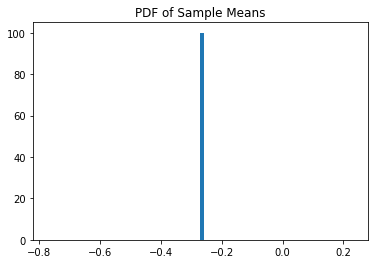

In [7]:
plt.hist(sample_mean, density=True, bins=100)
plt.title("PDF of Sample Means")
plt.show()

In [32]:
sample_means = []

# number of sample
sample_size = 1000

# sample size
num_of_samples = 6000

each_sample_means = []

mean_sample_means = []
std_sample_means = []

# for each sampling
for i in range(0, num_of_samples):
    # sampling 1000 samples from population
    x_sampled = np.random.normal(loc=mu, scale=sigma, size=sample_size)
    
    # collect mean of each sample
    each_sample_means.append(sum(x_sampled) / len(x_sampled))
    
    # appending mean and std of sample means at each iteration
    mean_sample_means.append(np.mean(each_sample_means))
    std_sample_means.append(np.std(each_sample_means))
    
    if i % 1000 == 0:
        # collecting sample means for visualization after every 1000 iterations
        sample_means.append(each_sample_means.copy())


## Plot for the distribution of sample means

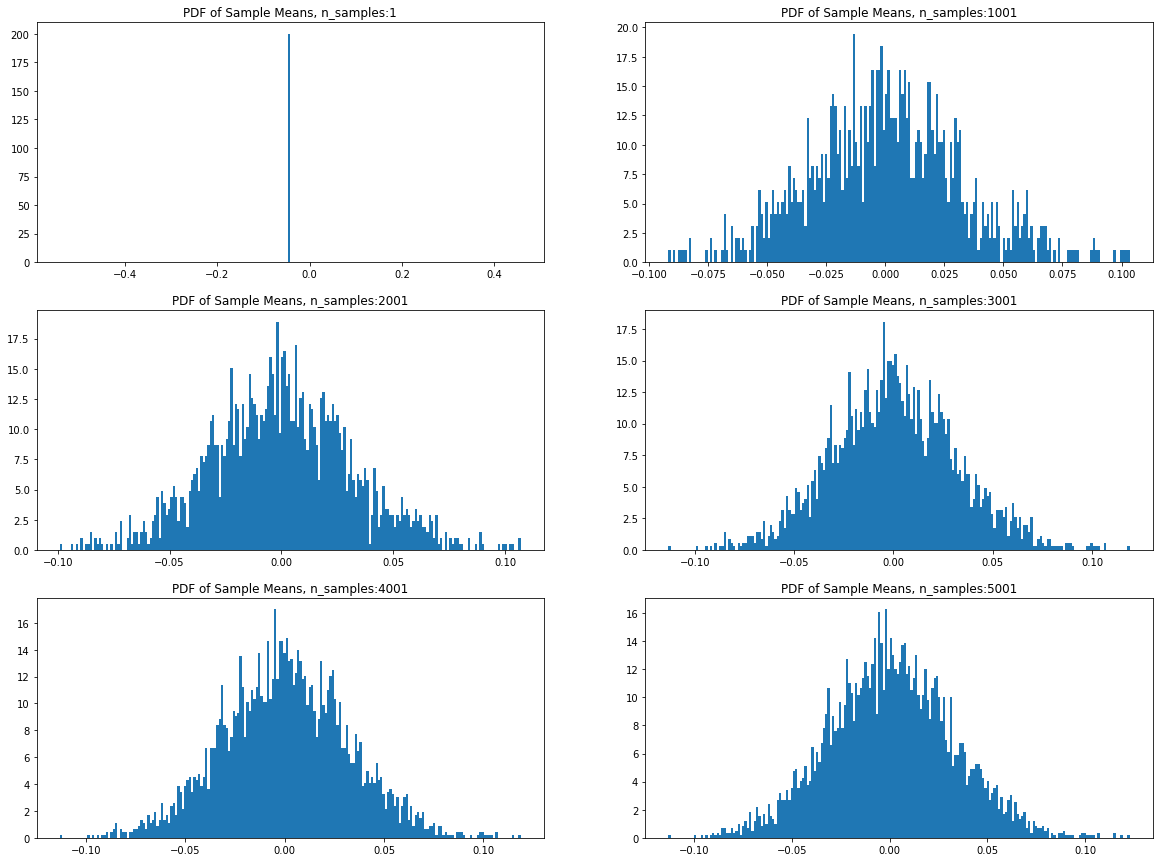

In [9]:
cols = 2
rows = 3

fig, ax = plt.subplots(rows, cols, figsize=(20,15))

n = 0

for i in range(0, rows):
    for j in range(0, cols):
        ax[i, j].hist(sample_means[n], bins=200, density=True)
        ax[i, j].set_title(label="PDF of Sample Means, n_samples:" + str(len(sample_means[n])))
        
        n += 1

plt.show()

In [33]:
last_sample = sample_means[-1]

In [34]:
mean_of_sample_means = np.mean(last_sample)

In [35]:
std_of_sample_means = np.std(last_sample)

## Plot to compare distribution of sample means and a Normal Distribution

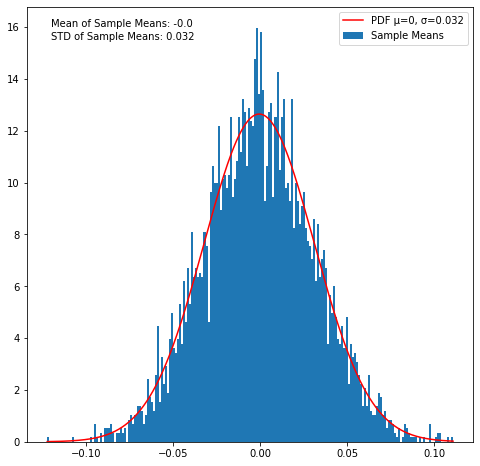

In [36]:
plt.figure(figsize=(8, 8))
plt.hist(last_sample, bins=200, density=True, label='Sample Means')

x_min = np.min(last_sample)
x_max = np.max(last_sample)

x = np.linspace(x_min, x_max, 100000)
y = stats.norm.pdf(x, mean_of_sample_means, std_of_sample_means)

plt.plot(x, y, label=f'PDF µ={mu}, σ={np.round(sigma/np.sqrt(sample_size), 3)}', c='r')
plt.text(-0.12, 16, f"Mean of Sample Means: {np.round(mean_of_sample_means, 3)}")
plt.text(-0.12, 15.5, f"STD of Sample Means: {np.round(std_of_sample_means, 3)}")
plt.legend()
plt.show()

In [37]:
print("Mean of Sample Means:", np.round(np.mean(last_sample), 3))
print("Mean of Population:", mu)
print("Standard Deviation of Sample Means:", np.round(np.std(last_sample), 3))
print("Standard Deviation of Population:", np.sqrt(variance))
print("Standard Deviation of Population / Square Root of Sample Size:", np.round(sigma/np.sqrt(sample_size), 3))

Mean of Sample Means: -0.0
Mean of Population: 0
Standard Deviation of Sample Means: 0.032
Standard Deviation of Population: 1.0
Standard Deviation of Population / Square Root of Sample Size: 0.032


 <br>
 <br>
 <br>
 
 # Normalization

In [42]:
import pandas as pd
df = pd.read_csv("../../bigamart_data.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [43]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [44]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
df = df[num_cols]
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


In [45]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [48]:
x = 21.35
xmin = 4.555
xmax = 21.35

(x-xmin)/(xmax-xmin)

1.0

Scikit Learn

pip install scikit-learn

In [22]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

df_norm = norm.fit_transform(df)

df_norm = pd.DataFrame(df_norm, columns=df.columns)
df_norm.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0.282525,0.048866,0.927507,0.283587
1,0.081274,0.058705,0.072068,0.031419
2,0.770765,0.051037,0.468288,0.158115
3,0.871986,0.000000,0.640093,0.053555
4,0.260494,0.000000,0.095805,0.073651


In [23]:
df_norm.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,0.494352,0.201382,0.465635,0.164551
std,0.276479,0.157123,0.264327,0.130729
min,0.000000,0.000000,0.000000,0.000000
25%,0.251191,0.082187,0.265437,0.061359
50%,0.479012,0.164228,0.474209,0.134908
75%,0.732063,0.288026,0.655156,0.235030
max,1.000000,1.000000,1.000000,1.000000


## Standardization

In [1]:
import pandas as pd
df = pd.read_csv("bigamart_data.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
df = df[num_cols]
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


In [3]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_standardized = scaler.fit_transform(df)

df_standardized= pd.DataFrame(df_standardized, columns=df.columns)
df_standardized

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,-0.766217,-0.970732,1.747454,0.910601
1,-1.494175,-0.908111,-1.489023,-1.018440
2,0.999834,-0.956917,0.010040,-0.049238
3,1.365966,-1.281758,0.660050,-0.849103
4,-0.845905,-1.281758,-1.399220,-0.695373
...,...,...,...,...
8518,-1.290648,-0.181193,1.180783,0.349915
8519,-0.964360,-0.371154,-0.527301,-0.956402
8520,-0.486234,-0.599784,-0.897208,-0.579100
8521,-1.216345,1.532880,-0.607977,-0.196725


In [5]:
df_standardized.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7.060000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,4.060963e-16,1.529797e-16,-1.638175e-16,1.677775e-16
std,1.000071e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-1.788158e+00,-1.281758e+00,-1.761688e+00,-1.258790e+00
25%,-8.795570e-01,-7.586531e-01,-7.574307e-01,-7.894057e-01
50%,-5.548958e-02,-2.364792e-01,3.243893e-02,-2.267687e-01
75%,8.598417e-01,5.514755e-01,7.170372e-01,5.391513e-01
max,1.829016e+00,5.083050e+00,2.021724e+00,6.391045e+00


In [8]:
2.5 + (1.88*(0.6/10))

2.6128